# Momento de Retroalimentación: Módulo 1 Utilización, procesamiento y visualización de grandes volúmenes de datos (Portafolio Análisis)

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 23 de Octubre de 2023

---

## Regresión Lineal

La regresión lineal es una técnica estadística que se utiliza para modelar la relación entre una variable dependiente (objetivo) y una o más variables independientes (características o predictores). El objetivo es encontrar una ecuación lineal que mejor describa cómo las variables independientes influyen en la variable dependiente. En otras palabras, se trata de ajustar una línea recta a los datos de manera que minimice la diferencia entre los valores observados y los valores predichos por el modelo.

El siguiente código es un ejemplo de cómo realizar una regresión lineal utilizando la biblioteca `PySpark`, que es una biblioteca de código abierto para el procesamiento y análisis de datos a gran escala. A continuación, se describirá a detalle la función del código.

Como primer paso, se importan las bibliotecas necesarias para realizar la regresión lineal y se crea una sesión de Spark llamada 'Regresión Lineal' que se utilizará para procesar los datos.

Posteriormente, realizamos la lectura del archivo txt que contiene los datos que se utilizarán para realizar la regresión lineal. En este caso, se utilizó un archivo txt ejemplo llamado `sample_linear_regression_data.txt`.

Una vez que se han cargado los datos, se realiza la definición y ajuste del modelo de regresión lineal. Para ello, se utiliza la función `LinearRegression` de la biblioteca `pyspark.ml.regression`. Esta función recibe como parámetros el número máximo de iteraciones que se realizarán para ajustar el modelo (`maxIter`), el valor de regularización (`regParam`) y el valor de elasticidad (`elasticNetParam`). Asimismo, el ajuste del modelo se lleva a cabo utilizando la función `lr.fit(training)`.

Asimismo, obtenemos los coeficientes e intercepto del modelo de regresión lineal utilizando las funciones `lrModel.coefficients` y `lrModel.intercept`, respectivamente. Finalmente, se imprimen algunas métricas de evaluación del modelo, como el número de iteraciones, el historial del objetivo, los residuos, el error cuadrático medio (RMSE) y el coeficiente de determinación ($R^2$). Estas métricas proporcionan información sobre el rendimiento del modelo y su capacidad para hacer predicciones precisas.




In [51]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Regresión Lineal").getOrCreate()

# Cargar datos de entrenamiento
training = spark.read.format("libsvm").load("datasets/sample_linear_regression_data.txt")

# Definir y ajustar el modelo de regresión lineal
lr = LinearRegression(maxIter=100, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(training)

# Imprimir los coeficientes y la intercepción del modelo
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Resumir el modelo sobre el conjunto de entrenamiento e imprimir algunas métricas
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


23/10/23 18:32:41 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.


Coefficients: [0.0,0.3229251667740594,-0.3438548034562219,1.915601702345841,0.05288058680386255,0.765962720459771,0.0,-0.15105392669186676,-0.21587930360904645,0.2202536918881343]
Intercept: 0.15989368442397356
numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.49363616643404634, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053553|
|  -5.204019455758822|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719487|
|  -10.00431602969873|
|  2.0623978070504845|
|  3.1117508432954772|
|  -15.89360822941938|
|  -5.036284254673026|
|  6.4832158769943335|
|  12.429497299109002|
|  -20.32003219007654|
|    -2.0049838218725|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


Por último, realizamos un gráfico de dispersión para visualizar los datos reales y los datos predichos por el modelo de regresión lineal. Para ello, utilizamos la biblioteca `matplotlib.pyplot` y las función `plt.scatter`. En color gris podemos observar las etiquetas reales y de color verde las predicciones del modelo.

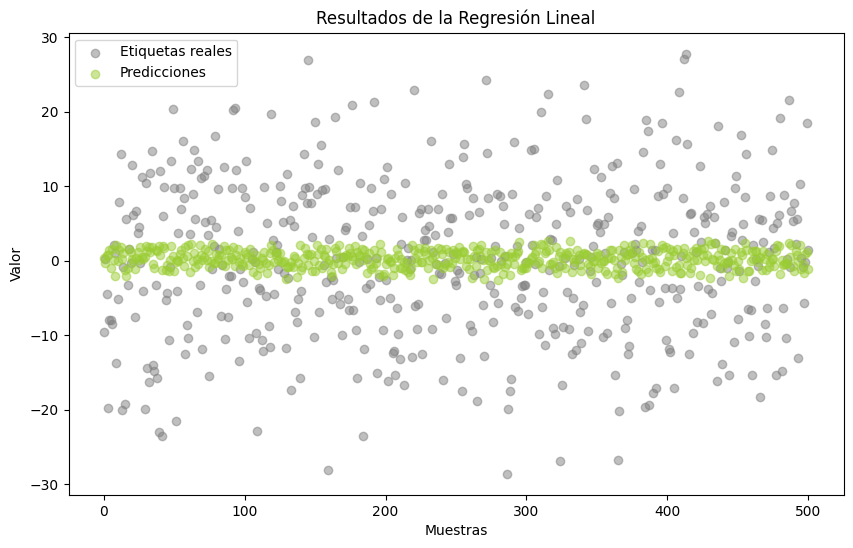

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener las predicciones del modelo
predictions = lrModel.transform(training)

# Extraer las etiquetas reales y las predicciones del DataFrame
labels = [float(row.label) for row in predictions.select("label").collect()]
predicted = [float(row.prediction) for row in predictions.select("prediction").collect()]

# Crear un arreglo de valores x para el gráfico
x = np.arange(len(labels))

# Graficar las etiquetas reales y las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(x, labels, color='gray', label='Etiquetas reales', alpha=0.5)
plt.scatter(x, predicted, color='yellowgreen', label='Predicciones', alpha=0.5)
plt.xlabel("Muestras")
plt.ylabel("Valor")
plt.legend()
plt.title("Resultados de la Regresión Lineal")
plt.show()

De acuerdo con los resultados obtenidos anteriormente, podemos concluir que el modelo de regresión lineal no es efectivo para describir la relación entre las variables independientes y la variable dependiente. Esto se debe a que el coeficiente de determinación ($R^2$) es muy bajo (0.022), lo que indica que el modelo no es capaz de explicar la variabilidad de los datos. Por lo tanto, es necesario utilizar otro modelo que sea más adecuado para los datos. Aunado a lo anterior, el error cuadrático medio (RMSE) es muy alto (10.19), lo que indica que el modelo no es capaz de predecir con precisión los valores de la variable dependiente.

A pesar de que al modelo solo le tomó 6 iteraciones ajustarse (convergiendo en un valor alrededor de 0.4936), la gráfica de dispersión refuerza la idea de que el modelo no es adecuado para los datos, ya que las predicciones del modelo no se ajustan a los datos reales.

In [53]:
# Detener la sesión de Spark
spark.stop()

## Clasificación

La regresión logística es un método de análisis estadístico utilizado para predecir una variable binaria (sí/no, 1/0, verdadero/falso) en función de una o más variables independientes. Aunque se llama "regresión", en realidad se utiliza para la clasificación. La regresión logística se basa en la función logística para modelar la probabilidad de que una observación pertenezca a una de las dos categorías. El modelo de regresión logística genera coeficientes que representan la contribución relativa de cada variable independiente en la predicción de la probabilidad. A continuación, se describe el código utilizado para realizar una regresión logística utilizando la biblioteca `PySpark`.

Primero que nada, se importan las librerías necesarias para realizar la regresión logística y se crea una sesión de Spark llamada 'Regresión Logística' que se utilizará para procesar los datos. Posteriormente, realizamos la lectura del archivo txt que contiene los datos que se utilizarán para realizar la regresión logística. En este caso, se utilizó un archivo txt ejemplo llamado `sample_libsvm_data.txt`.

Para definir y ajustar el modelo, utilizamos la función `LogisticRegression` de la biblioteca `pyspark.ml.classification`. Esta función recibe como parámetros el número máximo de iteraciones que se realizarán para ajustar el modelo (`maxIter`), el valor de regularización (`regParam`) y el valor de elasticidad (`elasticNetParam`). Asimismo, el ajuste del modelo se lleva a cabo utilizando la función `lr.fit(training)`.

Posteriormente, se imprimen los coeficientes e intercepto del modelo de regresión logística utilizando las funciones `lrModel.coefficients` y `lrModel.intercept`, respectivamente.

In [54]:
from pyspark.ml.classification import LogisticRegression

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Regresión Logística").getOrCreate()

# Cargar datos de entrenamiento
training = spark.read.format("libsvm").load("datasets/sample_libsvm_data.txt")

# Definir y ajustar el modelo de regresión logística
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(training)

# Imprimir los coeficientes e intercepto del modelo
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

23/10/23 18:32:42 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.


Coefficients: (692,[272,300,323,350,351,378,379,405,406,407,428,433,434,435,455,456,461,462,483,484,489,490,496,511,512,517,539,540,568],[-7.52068987138425e-05,-8.11577314684714e-05,3.814692771846355e-05,0.0003776490540424338,0.0003405148366194406,0.0005514455157343101,0.0004085386116096917,0.0004197467332749456,0.0008119171358670024,0.0005027708372668745,-2.3929260406602224e-05,0.0005745048020902285,0.0009037546426803727,7.818229700244064e-05,-2.178755195291346e-05,-3.402165821789672e-05,0.0004966517360637628,0.000819055782837036,-8.017982139522748e-05,-2.7431694037836715e-05,0.0004810832226238985,0.0004840801762677868,-8.92647292001234e-06,-0.0003414881233042732,-8.950592574121545e-05,0.0004864546911689213,-8.478698005186263e-05,-0.00042347832158317646,-7.29653577763139e-05])
Intercept: -0.5991460286401427


Asimismo, realizamos el proceso anterior pero implementando una regresión logística con la familia de distribución multinomial. Para ello, utilizamos la función `LogisticRegression` de la biblioteca `pyspark.ml.classification` y especificamos el parámetro `family` con el valor `multinomial`. De igual manera, se imprimen los coeficientes e intercepto del modelo de regresión logística utilizando las funciones `lrModel.coefficients` y `lrModel.intercept`, respectivamente.

In [55]:
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

# Ajustar el modelo de regresión logística con la familia multinomial
mlrModel = mlr.fit(training)

# Imprimir los coeficientes e intercepto del modelo con la familia multinomial
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Multinomial coefficients: 2 X 692 CSRMatrix
(0,272) 0.0001
(0,300) 0.0001
(0,350) -0.0002
(0,351) -0.0001
(0,378) -0.0003
(0,379) -0.0002
(0,405) -0.0002
(0,406) -0.0004
(0,407) -0.0002
(0,433) -0.0003
(0,434) -0.0005
(0,435) -0.0001
(0,456) 0.0
(0,461) -0.0002
(0,462) -0.0004
(0,483) 0.0001
..
..
Multinomial intercepts: [0.275058758571811,-0.275058758571811]


A continuación, obtenemos el resumen del modelo ajustado previamente. El resumen se almacena en la variable trainingSummary y proporciona información relevante sobre el rendimiento del modelo en los datos de entrenamiento. Posteriormente, se accede al historial del objetivo del modelo a través de trainingSummary.objectiveHistory. El objetivo en este contexto se refiere a la función de costo utilizada durante el proceso de ajuste del modelo. El código imprime el historial del objetivo, lo que permite visualizar cómo cambió esta función a medida que se realizaron iteraciones durante el ajuste del modelo.

Como método de evaluación, obtenemos la curva ROC (Receiver Operating Characteristic) y el área bajo la curva ROC (AUC) a través de `trainingSummary.roc.show()`. La curva ROC es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC es una métrica que cuantifica la capacidad predictiva del modelo. Al mostrar la curva ROC y el AUC, el código proporciona información importante sobre la capacidad de clasificación del modelo en términos de sensibilidad y especificidad.

Por último, el código ajusta el umbral del modelo con el objetivo de maximizar la puntuación F (F-Measure). La puntuación F es una métrica que combina la precisión y la exhaustividad del modelo. Esto se logra mediante la identificación del umbral que produce la puntuación F más alta. Una vez encontrado el umbral óptimo, se establece en el modelo de regresión logística.

In [56]:
# Obtenemos el resumen del modelo de regresión logística
trainingSummary = lrModel.summary

# Obtenemos el objetivo por iteración
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtenemos la curva ROC y el área bajo la curva ROC
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.6833149135741672
0.6661906127558116
0.6207433672479604
0.6131541253123871
0.6059149689952394
0.5923656241678249
0.5898233082838023
0.5868012627420286
0.5844432058719139
0.5830790068041749
0.5807015754032355
+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.017543859649122806|
|0.0| 0.03508771929824561|
|0.0| 0.05263157894736842|
|0.0| 0.07017543859649122|
|0.0| 0.08771929824561403|
|0.0| 0.10526315789473684|
|0.0| 0.12280701754385964|
|0.0| 0.14035087719298245|
|0.0| 0.15789473684210525|
|0.0| 0.17543859649122806|
|0.0| 0.19298245614035087|
|0.0| 0.21052631578947367|
|0.0| 0.22807017543859648|
|0.0| 0.24561403508771928|
|0.0|  0.2631578947368421|
|0.0|  0.2807017543859649|
|0.0|  0.2982456140350877|
|0.0|  0.3157894736842105|
|0.0|  0.3333333333333333|
+---+--------------------+
only showing top 20 rows

areaUnderROC: 1.0


LogisticRegression_4dc564159e99

A continuación, se muestra el gráfico de la curva ROC y el área bajo la curva ROC (AUC) para el modelo de regresión logística con la familia de distribución multinomial. Como se puede observar, el área bajo la curva ROC es de 1.0, lo que indica que el modelo es capaz de clasificar correctamente los datos.

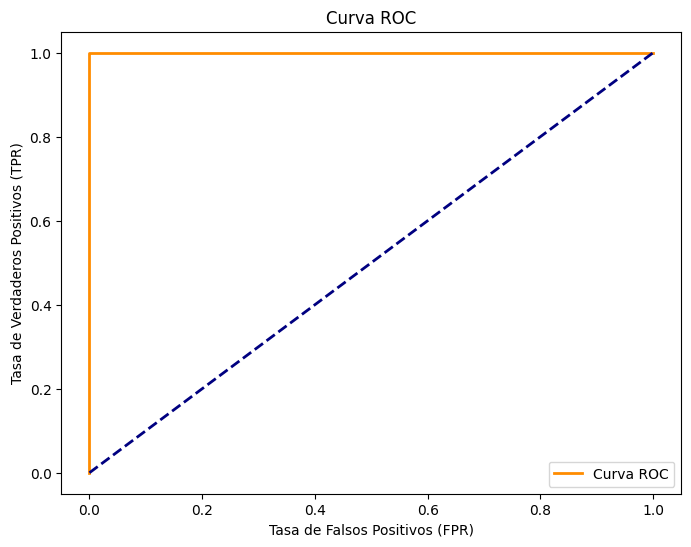

In [57]:
# Obtener la curva ROC
roc = trainingSummary.roc.toPandas()

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], color='darkorange', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Además, realizamos una matriz de confusión que nos ayuda a visualizar el rendimiento del modelo de regresión logística. La matriz de confusión muestra el número de predicciones correctas e incorrectas realizadas por el modelo en cada clase. En este caso, el modelo clasificó correctamente todos los datos, por lo que la matriz de confusión muestra que hubo muy pocas predicciones incorrectas (lo que se ve reflejado en la presencia de los valores de la matriz sobre la diagonal principal).

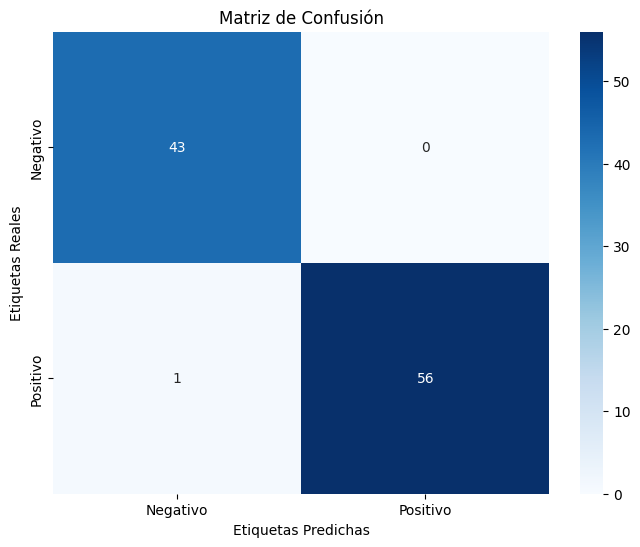

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Hacer predicciones en los datos de entrenamiento
predictions = lrModel.transform(training)

# Extraer las etiquetas reales y las predicciones
labels = [float(row.label) for row in predictions.select("label").collect()]
predicted = [float(row.prediction) for row in predictions.select("prediction").collect()]

# Calcular la matriz de confusión
cm = confusion_matrix(labels, predicted)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Reales")
plt.title("Matriz de Confusión")
plt.show()

Una vez obtenidos los resultados del modelo, podemos concluir que el modelo de regresión logística con la familia de distribución multinomial es capaz de clasificar correctamente los datos. Esto se debe a que el área bajo la curva ROC es de 1.0, lo que indica que el modelo es capaz de clasificar correctamente los datos. Los coeficientes y los interceptos proporcionan información sobre la influencia de las características en la predicción de las clases objetivo, y el historial del objetivo muestra que el modelo se ajustó de manera eficiente. 

In [59]:
# Detener la sesión de Spark
spark.stop()

## Clustering

El clustering utilizando el algoritmo K-Means es una técnica de aprendizaje automático no supervisado que se utiliza para agrupar un conjunto de datos en clusters o grupos de elementos similares. En el contexto del K-Means, un "cluster" es un grupo de puntos de datos que comparten características o similitudes entre sí, mientras que los distintos clusters se consideran diferentes y separados.

El algoritmo K-Means funciona de la siguiente manera: se selecciona un número predeterminado de centroides (puntos representativos) iniciales y se asigna cada punto de datos al centroide más cercano. Luego, se recalculan los centroides como el centro geométrico de todos los puntos asignados a ese cluster. Este proceso de asignación y actualización de centroides se repite iterativamente hasta que se alcance un criterio de convergencia, como la estabilidad en la asignación de puntos o el número máximo de iteraciones.

El objetivo del K-Means es encontrar clusters que minimicen la varianza intra-cluster, es decir, que los puntos dentro de un cluster sean similares entre sí, y que maximicen la varianza entre clusters, de modo que los clusters sean lo más diferentes posible entre sí. El valor de "K" en K-Means representa el número de clusters que se desea encontrar, y se debe seleccionar de antemano. A continuación, se describe el código utilizado para realizar un clustering utilizando el algoritmo K-Means utilizando la biblioteca `PySpark`.

Primero que nada, se importan las librerías necesarias para realizar el clustering y se crea una sesión de Spark llamada 'K Means' que se utilizará para procesar los datos. Posteriormente, realizamos la lectura del archivo txt que contiene los datos que se utilizarán para realizar el clustering. En este caso, se utilizó un archivo txt ejemplo llamado `sample_kmeans_data.txt`. 

A continuación, se procede a entrenar un modelo de K-Means con el valor de "k" (número de clusters) establecido en 2. Se utiliza el algoritmo K-Means para agrupar los datos en dos clusters diferentes. El modelo se crea utilizando la biblioteca de Spark y se ajusta a los datos de entrenamiento. El resultado se almacena en un objeto llamado `model`.

Una vez que se ha ajustado el modelo, se generan predicciones utilizando el mismo conjunto de datos de entrenamiento. Esto significa que cada punto de datos en el conjunto de datos se asigna a uno de los dos clusters basado en la similitud de las características.

Para evaluar la calidad del modelo de K-Means, se utiliza el coeficiente Silhouette, que mide la calidad de los clusters formados. El valor del coeficiente Silhouette se imprime en la salida. Un valor más alto del coeficiente Silhouette indica una mejor separación entre los clusters y, por lo tanto, un mejor rendimiento del modelo.

Finalmente, el código muestra los centroides de los clusters obtenidos. Los centroides representan los puntos que están en el centro de cada cluster y proporcionan información sobre las características promedio de los puntos en ese cluster.

In [60]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Crear una sesión de Spark
spark = SparkSession.builder.appName("K Means").getOrCreate()

# Cargar datos de entrenamiento
dataset = spark.read.format("libsvm").load("datasets/sample_kmeans_data.txt")

# Entrenar un modelo de K-Means con k = 2
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Obtener las predicciones del modelo
predictions = model.transform(dataset)

# Evaluar el modelo de K-Means
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Mostrar los resultados
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

23/10/23 18:32:44 WARN LibSVMFileFormat: 'numFeatures' option not specified, determining the number of features by going though the input. If you know the number in advance, please specify it via 'numFeatures' option to avoid the extra scan.


Silhouette with squared euclidean distance = 0.9997530305375207
Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


A continuación, se muestra un gráfico que representa los clusters obtenidos. En este caso, se utilizó un valor de "k" igual a 2, por lo que se obtuvieron dos clusters. Los puntos de datos se representan como círculos de color azul y amarillo respectivamente, mientras que los centroides se representan como cruces de color rojo y azul respectivamente. Como se puede observar, los puntos de datos se agrupan en dos clusters diferentes, y los centroides se encuentran en el centro de cada cluster.

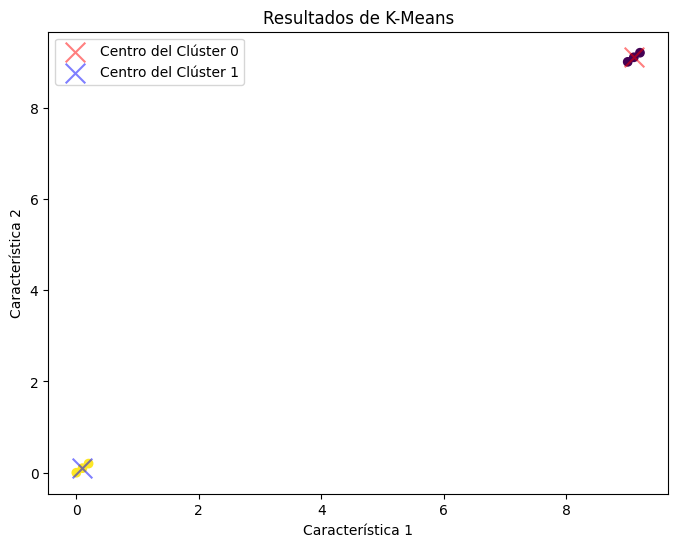

In [61]:
# Obtener los resultados como un DataFrame de pandas
results = predictions.select("features", "prediction").toPandas()

# Graficar los puntos de datos y los centros de clústeres
plt.figure(figsize=(8, 6))
plt.scatter(results["features"].apply(lambda x: x[0]), results["features"].apply(lambda x: x[1]), c=results["prediction"], cmap="viridis")
plt.scatter(model.clusterCenters()[0][0], model.clusterCenters()[0][1], c="red", marker="x", s=200, label="Centro del Clúster 0", alpha=0.5)
plt.scatter(model.clusterCenters()[1][0], model.clusterCenters()[1][1], c="blue", marker="x", s=200, label="Centro del Clúster 1", alpha=0.5)
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Resultados de K-Means")
plt.legend()
plt.show()


Basado en el coeficiente Silhouette y los centroides de los clusters, se puede concluir que el modelo de K-Means ha tenido un rendimiento excepcional en la tarea de agrupación de datos. Los clusters están muy bien definidos y separados entre sí, lo que indica que los puntos dentro de cada cluster son muy similares y que los puntos entre clusters son significativamente diferentes en términos de sus características. Los centroides de los clusters también confirman que los clusters están bien definidos en términos de sus propiedades promedio. En resumen, el modelo de K-Means ha logrado con éxito la tarea de agrupar los datos en dos clusters altamente distintivos.

In [62]:
# Detener la sesión de Spark
spark.stop()